In [2]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
target_names = ['top', 'pants', 'pullover', 
                'dress', 'coat', 'sandal', 'shirt',
                'sneaker', 'bag', 'ankleboot']

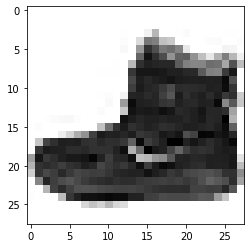

9
ankleboot


In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(X_train[0], cmap = 'binary')
plt.show()
print(y_train[0])
print(target_names[y_train[0]])

In [11]:
X_train_n = X_train/255
X_test_n = X_test/255

X_train_n = X_train_n[:,:,:, np.newaxis]
X_test_n = X_test_n[:,:,:, np.newaxis]

X_train_n.shape

(60000, 28, 28, 1)

In [14]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation = 'relu',
                input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))
          
model.compile(optimizer = 'adam', metrics = ['accuracy'],
             loss = 'sparse_categorical_crossentropy')

In [15]:
model.fit(X_train_n, 
          y_train, 
          validation_data = (X_test_n, y_test),
          epochs = 3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.5523 - accuracy: 0.8014 - val_loss: 0.4295 - val_accuracy: 0.8438
Epoch 2/3
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.3760 - accuracy: 0.8660 - val_loss: 0.3629 - val_accuracy: 0.8715
Epoch 3/3
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.3362 - accuracy: 0.8790 - val_loss: 0.3429 - val_accuracy: 0.8773


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [19]:
for layer in model.layers:
    print(layer.get_weights())

[array([[[[ 2.82488596e-02,  1.81333802e-03, -6.64804637e-01,
          -6.00559004e-02,  2.94939041e-01,  2.36335784e-01,
           8.57546739e-03,  2.58954674e-01,  2.72884190e-01,
          -5.81272282e-02, -7.45494217e-02, -1.65407479e-01,
           3.32134306e-01,  6.32530153e-02, -3.38475294e-02,
          -4.58357595e-02]],

        [[ 5.93029968e-02,  6.71621859e-02, -1.38247478e+00,
          -2.57670343e-01, -2.98045248e-01, -1.61765113e-01,
           3.83631587e-01, -1.93520084e-01,  2.75379002e-01,
           3.38402361e-01,  2.66802032e-02,  2.22646132e-01,
          -1.72949493e-01,  2.69326061e-01, -9.51339826e-02,
           1.39951482e-01]],

        [[ 2.49349490e-01,  2.78020620e-01, -1.02188540e+00,
           3.02903950e-01, -1.98069230e-01,  2.42624342e-01,
           1.14318818e-01, -6.76190257e-02,  1.82055086e-01,
          -1.52656421e-01, -2.67685384e-01,  7.63070583e-02,
          -1.69126406e-01, -3.14105421e-01, -5.66202104e-02,
          -1.16636209e-0

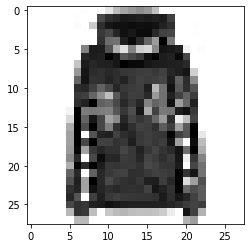

4
4
coat


In [27]:
plt.imshow(X_test[541], cmap = 'binary')
plt.show()

print(np.argmax(model.predict(X_test_n[np.newaxis, 541])))
print(y_test[541])
print(target_names[y_test[541]])